<a href="https://colab.research.google.com/github/Sohammhatre10/IrisClassifier/blob/main/IrisClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("Iris.csv")

In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
import matplotlib.pyplot as plt
species = []
for value in df['Species']:
  if value not in species:
    species.append(value)
print(species)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


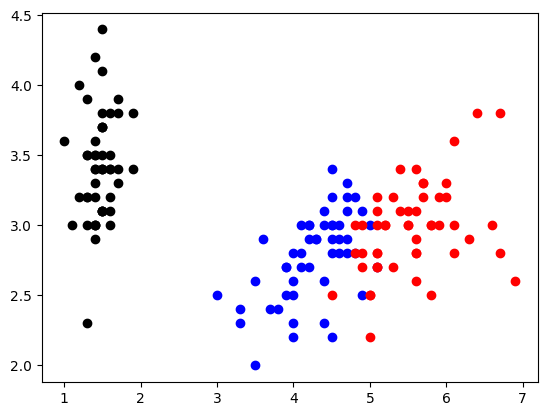

In [8]:
colors = ['black', 'blue', 'red']
for i in range(len(species)):
  actual = df[df['Species'] == species[i]]
  plt.scatter(actual['PetalLengthCm'], actual['SepalWidthCm'], c = colors[i], label=species[i])

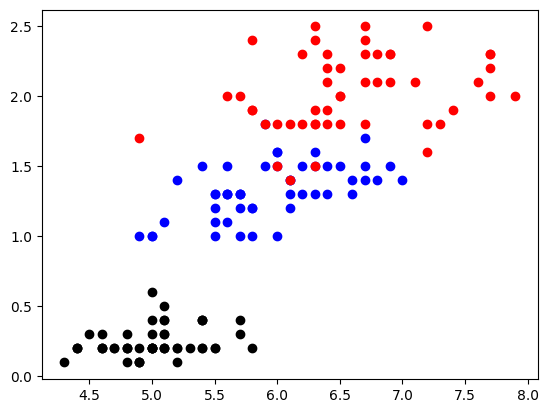

In [9]:
for i in range(len(species)):
  actual = df[df['Species'] == species[i]]
  plt.scatter(actual['SepalLengthCm'], actual['PetalWidthCm'], c = colors[i], label=species[i])

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [11]:
import seaborn as sns

<ipython-input-12-aa67b6fdecbe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='BuPu')


<Axes: >

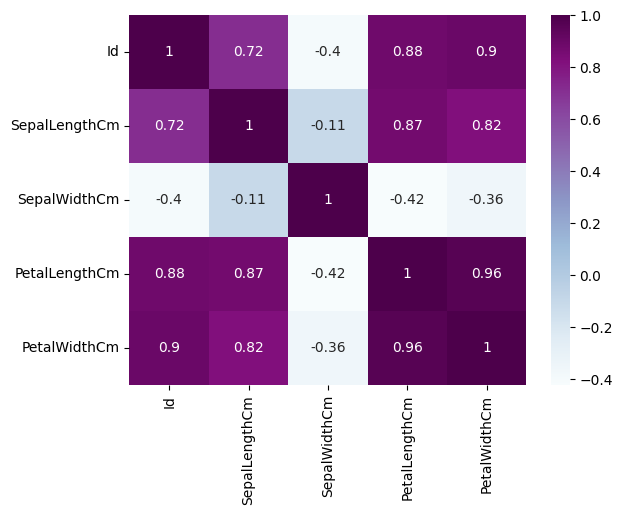

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='BuPu')

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

x = df.drop(columns=['Species'])
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75)
print(y_test)

18         Iris-setosa
61     Iris-versicolor
87     Iris-versicolor
100     Iris-virginica
91     Iris-versicolor
            ...       
66     Iris-versicolor
128     Iris-virginica
62     Iris-versicolor
137     Iris-virginica
88     Iris-versicolor
Name: Species, Length: 113, dtype: object


**KNN**

In [62]:
knn = KNeighborsClassifier()
knn.fit(x_train.values,y_train.values)
print(knn.score(x_test, y_test)*100)

87.61061946902655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [63]:
knn.fit(x_train.values,y_train.values)

KNeighborsClassifier()

**Logistic Regression**

In [64]:
LogisticRegresion = LogisticRegression()
LogisticRegresion.fit(x_train.values, y_train.values)
print(LogisticRegresion.score(x_test,y_test)*100)

94.69026548672566


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [65]:
LogisticRegresion.fit(x_train.values,y_train.values)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Random Forest Classifier**

In [66]:
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(x_train.values, y_train.values)
print(RandomForestClassifier.score(x_test,y_test)*100)

99.11504424778761


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [67]:
RandomForestClassifier.fit(x_train.values, y_train.values)

RandomForestClassifier()